In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import importlib
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from scipy.stats import norm

In [0]:
for dirname, _, filenames in os.walk(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest2.txt
C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt


In [0]:
df_test_1 = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest.txt',  header=0, parse_dates=True, squeeze=True)
df_test_2 = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatest2.txt',  header=0, parse_dates=True, squeeze=True)
df_training = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\datatraining.txt',  header=0, parse_dates=True, squeeze=True)

In [0]:
df_test_1.head(5)
df_test_2.sample(5)
df_training.sample(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1564,2015-02-12 16:51:00,22.10,27.500,444.0,599.000000,0.004524,1
6410,2015-02-16 01:37:00,20.29,28.100,0.0,921.333333,0.004134,0
375,2015-02-11 21:02:00,20.79,29.395,0.0,486.000000,0.004463,0
7959,2015-02-17 03:26:00,20.10,30.500,0.0,720.000000,0.004437,0
3342,2015-02-13 22:28:59,20.10,31.600,0.0,511.000000,0.004599,0


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1933,2015-02-06 02:03:00,20.600,19.6000,0.0,435.00,0.002934,0
6051,2015-02-08 22:40:59,19.500,27.7000,0.0,447.00,0.003879,0
3196,2015-02-06 23:06:00,19.945,18.8400,0.0,440.00,0.002707,0
1412,2015-02-05 17:22:00,22.290,25.1500,433.0,967.50,0.004184,1
1357,2015-02-05 16:27:00,22.390,26.4175,438.0,1067.75,0.004423,1


In [0]:
from pandas import concat
df = concat([df_test_1, df_training, df_test_2], ignore_index = True)
#df = df.drop(axis)
df.head(10)

df.to_csv("dataframe.csv")

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1
5,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779,1
6,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1
7,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783,1
8,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794,1
9,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1


In [0]:
df.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

In [0]:
# grid of pies
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['Occupancy'].value_counts().plot(kind='pie', 
                                   title='Occupancy df',
                                   labels = '01',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1))

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['Occupancy'].value_counts().plot(kind='pie', 
                                   title='Occupancy test 1',
                                   labels = '01',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1))

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['Occupancy'].value_counts().plot(kind='pie', 
                                   title='Occupancy test 2',
                                   labels = '01',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1))

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['Occupancy'].value_counts().plot(kind='pie', 
                                   title='Occupancy trainig',
                                   labels = '01',
                                   autopct='%1.1f%%',
                                   explode= (0, 0.1))

plt.show()

In [0]:
import datetime

df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time
df['Hours'] = pd.to_datetime(df['date']).dt.hour
df['Minutes'] = pd.to_datetime(df['date']).dt.minute
df['Seconds'] = pd.to_datetime(df['date']).dt.second

df.sample(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Dates,Time,Hours,Minutes,Seconds
11982,2015-02-12 10:21:59,23.550000,22.500000,745.5,799.000000,0.004039,1,2015-02-12,10:21:59,10,21,59
13710,2015-02-13 15:10:00,23.000000,28.290000,505.0,564.500000,0.004919,1,2015-02-13,15:10:00,15,10,0
9913,2015-02-09 18:39:00,21.390000,36.590000,0.0,1466.000000,0.005776,0,2015-02-09,18:39:00,18,39,0
17980,2015-02-16 14:19:59,21.700000,28.767500,469.0,908.750000,0.004620,1,2015-02-16,14:19:59,14,19,59
11599,2015-02-12 03:59:00,20.650000,24.645000,0.0,593.000000,0.003705,0,2015-02-12,03:59:00,3,59,0
4306,2015-02-05 21:11:59,20.890000,19.945000,0.0,469.500000,0.003040,0,2015-02-05,21:11:59,21,11,59
12655,2015-02-12 21:35:00,21.100000,27.150000,0.0,564.500000,0.004200,0,2015-02-12,21:35:00,21,35,0
11265,2015-02-11 22:25:00,20.600000,28.195000,0.0,488.000000,0.004229,0,2015-02-11,22:25:00,22,25,0
1860,2015-02-03 21:19:00,21.033333,26.323333,0.0,628.666667,0.004054,0,2015-02-03,21:19:00,21,19,0
14216,2015-02-13 23:36:00,20.000000,33.245000,0.0,505.000000,0.004810,0,2015-02-13,23:36:00,23,36,0


In [0]:
df=df.drop('date', axis=1)
df.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Dates,Time,Hours,Minutes,Seconds
20555,20.815,27.7175,429.75,1505.25,0.004213,1,2015-02-18,09:15:00,9,15,0
20556,20.865,27.7450,423.50,1514.50,0.004230,1,2015-02-18,09:16:00,9,16,0
20557,20.890,27.7450,423.50,1521.50,0.004237,1,2015-02-18,09:16:59,9,16,59
20558,20.890,28.0225,418.75,1632.00,0.004279,1,2015-02-18,09:17:59,9,17,59
20559,21.000,28.1000,409.00,1864.00,0.004321,1,2015-02-18,09:19:00,9,19,0


In [0]:
df.dtypes

Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
Dates             object
Time              object
Hours              int64
Minutes            int64
Seconds            int64
dtype: object

In [0]:
df.describe(include=['O'])

,Dates,Time
count,20560,20560
unique,17,1440
top,2015-02-17,23:21:00
freq,1440,15


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 11 columns):
Temperature      20560 non-null float64
Humidity         20560 non-null float64
Light            20560 non-null float64
CO2              20560 non-null float64
HumidityRatio    20560 non-null float64
Occupancy        20560 non-null int64
Dates            20560 non-null object
Time             20560 non-null object
Hours            20560 non-null int64
Minutes          20560 non-null int64
Seconds          20560 non-null int64
dtypes: float64(5), int64(4), object(2)
memory usage: 1.7+ MB


In [0]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Minutes,Seconds
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031,11.446887,29.504621,18.360019
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503,7.075840,17.309172,27.316426
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,0.000000,0.000000,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000,5.000000,14.000000,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000,11.000000,29.000000,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000,18.000000,44.000000,59.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,23.000000,59.000000,59.000000


In [0]:
df.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
Dates            0
Time             0
Hours            0
Minutes          0
Seconds          0
dtype: int64

**TEMPERATURE**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['Temperature'].hist(bins = 6)
plt.title('Temperature df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['Temperature'].hist(bins=6)
plt.title('Temperature test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['Temperature'].hist(bins=6)
plt.title('Temperature test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['Temperature'].hist(bins=6)
plt.title('Temperature training')

plt.show()

Text(0.5, 1.0, 'Temperature')

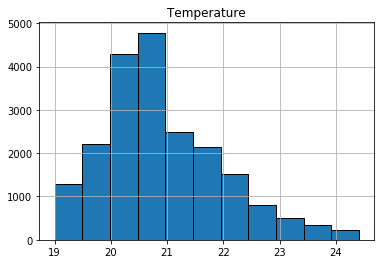

In [0]:
df['Temperature'].hist(bins=11, edgecolor='black')
plt.title('Temperature')
plt.show()

In [0]:
Temperature = df['Temperature'].copy()
Temperature.describe()

count    20560.000000
mean        20.906212
std          1.055315
min         19.000000
25%         20.200000
50%         20.700000
75%         21.525000
max         24.408333
Name: Temperature, dtype: float64

In [0]:
x_default = pd.crosstab(df['Temperature']//0.5*0.5, df['Occupancy'])
x_default

Occupancy,0,1
Temperature,,
19.0,1280,0
19.5,2177,23
20.0,4223,75
20.5,4403,387
21.0,1804,691
21.5,767,1400
22.0,396,1081
22.5,336,476
23.0,163,325


Text(0.5, 0, 'Temperature')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

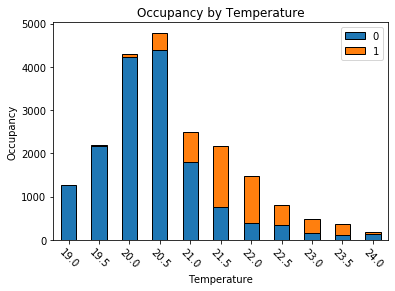

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Temperature', edgecolor='black')
pclass_xt = pd.crosstab(df['Temperature'], df['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Temperature')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['Humidity'].hist(bins=6)
plt.title('Humidity df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['Humidity'].hist(bins=6)
plt.title('Humidity test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['Humidity'].hist(bins=6)
plt.title('Humidity test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['Humidity'].hist(bins=6)
plt.title('Humidity training')

plt.show()

Text(0.5, 1.0, 'Humidity')

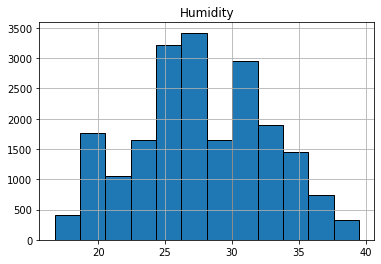

In [0]:
df['Humidity'].hist(bins=12, edgecolor='black')
plt.title('Humidity')
plt.show()

In [0]:
Humidity = df['Humidity'].copy()
Humidity.describe()

count    20560.000000
mean        27.655925
std          4.982154
min         16.745000
25%         24.500000
50%         27.290000
75%         31.290000
max         39.500000
Name: Humidity, dtype: float64

In [0]:
x_default = pd.crosstab(df['Humidity']//2*2, df['Occupancy'])
x_default

Occupancy,0,1
Humidity,,
16.0,254,0
18.0,1540,143
20.0,459,442
22.0,1442,174
24.0,2460,757
26.0,2707,914
28.0,1126,713
30.0,2366,666
32.0,1544,415


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

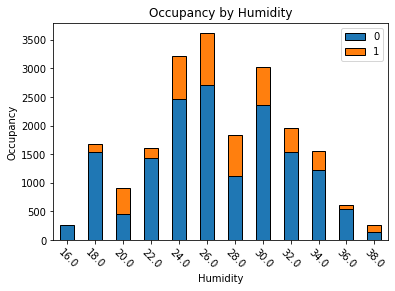

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Humidity', edgecolor='black')
pclass_xt = pd.crosstab(df['Humidity'], df['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
x_default_norm = x_default.div(x_default.sum(1).astype(float), axis=0)
x_default_norm

Occupancy,0,1
Humidity,,
16.0,1.000000,0.000000
18.0,0.915033,0.084967
20.0,0.509434,0.490566
22.0,0.892327,0.107673
24.0,0.764688,0.235312
26.0,0.747584,0.252416
28.0,0.612289,0.387711
30.0,0.780343,0.219657
32.0,0.788157,0.211843


Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

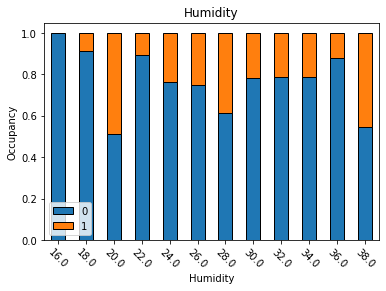

In [0]:
x_default_norm.plot(kind='bar', stacked=True, title='Humidity', edgecolor='black')
plt.xlabel('Humidity')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**LIGHT**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['Light'].hist(bins=6)
plt.title('Light df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['Light'].hist(bins=6)
plt.title('Light test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['Light'].hist(bins=6)
plt.title('Light test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['Light'].hist(bins=6)
plt.title('Light training')

plt.show()

Text(0.5, 1.0, 'Light')

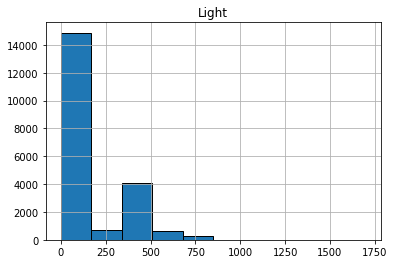

In [0]:
df['Light'].hist(bins=10, edgecolor='black')
plt.title('Light')
plt.show()

In [0]:
Light = df['Light'].copy()
Light.describe()

count    20560.000000
mean       130.756622
std        210.430875
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       1697.250000
Name: Light, dtype: float64

In [0]:
x_default = pd.crosstab(df['Light']//150*150, df['Occupancy'])
x_default

Occupancy,0,1
Light,,
0.0,14801,4
150.0,597,11
300.0,301,2290
450.0,80,1996
600.0,28,259
750.0,1,183
900.0,0,2
1200.0,0,1
1350.0,1,2


Text(0.5, 0, 'Light')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

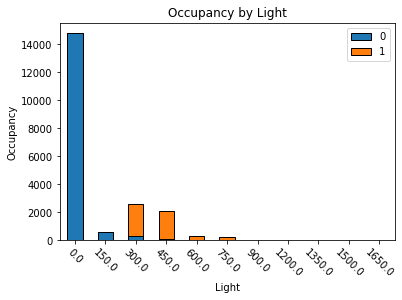

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by Light', edgecolor='black')
pclass_xt = pd.crosstab(df['Light'], df['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('Light')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

In [0]:
**CO2**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# CO2 df
plt.subplot2grid(fig_dims, (0, 0))
df['CO2'].hist(bins=6)
plt.title('CO2 df')

# CO2 test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['CO2'].hist(bins=6)
plt.title('CO2 test 1')

# CO2 test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['CO2'].hist(bins=6)
plt.title('CO2 test 2')

# CO2 training
plt.subplot2grid(fig_dims, (1, 1))
df_training['CO2'].hist(bins=6)
plt.title('CO2 training')

plt.show()

Text(0.5, 1.0, 'CO2')

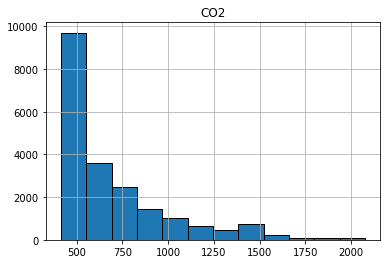

In [0]:
df['CO2'].hist(bins=12, edgecolor='black')
plt.title('CO2')
plt.show()

In [0]:
CO2 = df['CO2'].copy()
CO2.describe()

count    20560.000000
mean       690.553276
std        311.201281
min        412.750000
25%        460.000000
50%        565.416667
75%        804.666667
max       2076.500000
Name: CO2, dtype: float64

In [0]:
x_default = pd.crosstab(df['CO2']//150*150, df['Occupancy'])
x_default

Occupancy,0,1
CO2,,
300.0,4089,4
450.0,7046,502
600.0,2325,640
750.0,1058,983
900.0,184,1016
1050.0,163,715
1200.0,207,264
1350.0,398,351
1500.0,292,70


Text(0.5, 0, 'CO2')

Text(0, 0.5, 'Occupancy')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

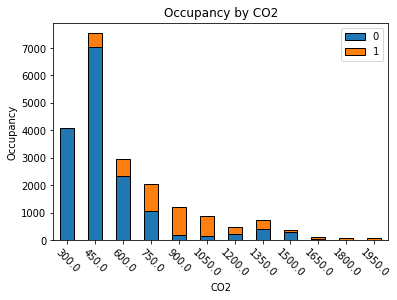

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by CO2', edgecolor='black')
pclass_xt = pd.crosstab(df['CO2'], df['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('CO2')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**HUMIDITY RATIO**

In [0]:
# grid of histograms
fig = plt.figure(figsize=(13, 13)) 
fig_dims = (3, 2)

# Temperature df
plt.subplot2grid(fig_dims, (0, 0))
df['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio df')

# Temperature test
plt.subplot2grid(fig_dims, (0, 1))
df_test_1['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio test 1')

# Temperature test2
plt.subplot2grid(fig_dims, (1, 0))
df_test_2['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio test 2')

# Temperature training
plt.subplot2grid(fig_dims, (1, 1))
df_training['HumidityRatio'].hist(bins=6)
plt.title('HumidityRatio training')

plt.show()

Text(0.5, 1.0, 'HumidityRatio')

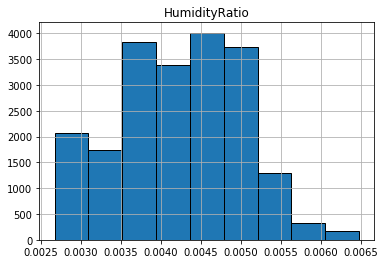

In [0]:
df['HumidityRatio'].hist(bins=9, edgecolor='black')
plt.title('HumidityRatio')
plt.show()

In [0]:
HumidityRatio = df['HumidityRatio'].copy()
HumidityRatio.describe()

count    20560.000000
mean         0.004228
std          0.000768
min          0.002674
25%          0.003719
50%          0.004292
75%          0.004832
max          0.006476
Name: HumidityRatio, dtype: float64

In [0]:
x_default = pd.crosstab(df['HumidityRatio']//0.00047*0.00047, df['Occupancy'])
x_default

Occupancy,0,1
HumidityRatio,,
0.00235,1036,8
0.00282,1215,272
0.00329,2525,465
0.00376,3704,461
0.00423,3395,1471
0.00470,2669,1154
0.00517,1202,497
0.00564,58,266
0.00611,6,156


Text(0.5, 0, 'HumidityRatio')

Text(0, 0.5, 'Occupancy')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

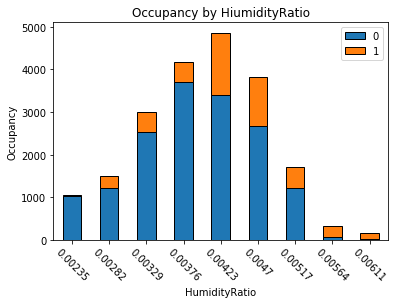

In [0]:
x_default.plot(kind='bar', stacked=True, title='Occupancy by HiumidityRatio', edgecolor='black')
pclass_xt = pd.crosstab(df['HumidityRatio'], df['Occupancy'])
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
plt.xlabel('HumidityRatio')
plt.ylabel('Occupancy')
plt.xticks(rotation=-45)
plt.legend()
plt.show()

**OCCUPANCY**

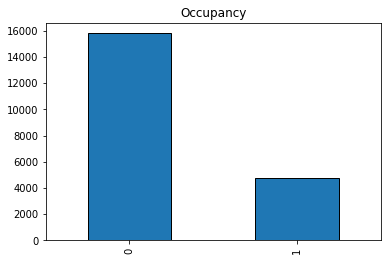

In [0]:
df['Occupancy'].value_counts().plot(kind='bar', title='Occupancy', edgecolor='black')
plt.show();

 **Project Task 1 - Basic Classifiers and Evaluation**

1. Prepare the dataset in order to build several basic classifiers able to predict room occupancy from the available variables. You are welcome in creating new variables.


2. Solve the classification task with k-NN (testing values of k), Naive Bayes, Logistic Regression, Decision Tree using cross-validation and/or random/grid search for parameter estimation.


3. Evaluate each classifier using Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.


4. Try to reduce the dimensionality of the dataset using the methods studied (or new ones). Test PCA and try to solve the classification task in two dimensions. Plot the dataset in the two new dimensions and observe the decision boundary and the one of the trained algorithms.


5. Analyze the value distribution of the class to predict and turn the dataset into an imbalanced version reaching a strong majority-minority distribution (e.g. 96%-4%). Then solve again the classification task adopting the various techniques studied (or new ones).


6. Select two continuous attributes, define a regression problem and try to solve it using different techniques reporting various evaluation measures. Plot the two-dimensional dataset. Then generalize to multiple linear regression and observe how the performance varies.


7. Draw your conclusions about the basic classifiers and techniques adopted in this analysis.

**COVARIANCE and CORRELATION**

In [0]:
df.cov()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Minutes,Seconds
Temperature,1.113689,-0.825273,152.911504,147.783162,1.663469e-04,0.247145,1.760426,-0.045731,0.014516
Humidity,-0.825273,24.821855,-30.884619,464.742392,3.568266e-03,0.097103,4.059833,-0.189143,0.027574
Light,152.911504,-30.884619,44281.153338,29344.775611,3.608619e-02,81.144565,140.348958,76.472514,4.141763
CO2,147.783162,464.742392,29344.775611,96846.237270,1.142153e-01,65.793610,280.551413,0.652284,-0.787756
HumidityRatio,0.000166,0.003568,0.036086,0.114215,5.896228e-07,0.000083,0.001098,-0.000043,0.000008
Occupancy,0.247145,0.097103,81.144565,65.793610,8.328510e-05,0.177664,0.307519,0.091982,0.005346
Hours,1.760426,4.059833,140.348958,280.551413,1.097693e-03,0.307519,50.067513,0.429765,0.464378
Minutes,-0.045731,-0.189143,76.472514,0.652284,-4.251556e-05,0.091982,0.429765,299.607450,12.906698
Seconds,0.014516,0.027574,4.141763,-0.787756,8.357969e-06,0.005346,0.464378,12.906698,746.187127


In [0]:
df_corr = df.copy()

In [0]:
df_corr.corr(method='pearson')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Minutes,Seconds
Temperature,1.000000,-0.156964,0.688571,0.449989,0.205280,0.555610,0.235753,-0.002504,0.000504
Humidity,-0.156964,1.000000,-0.029459,0.299746,0.932724,0.046240,0.115163,-0.002193,0.000203
Light,0.688571,-0.029459,1.000000,0.448105,0.223329,0.914850,0.094259,0.020995,0.000721
CO2,0.449989,0.299746,0.448105,1.000000,0.477965,0.501582,0.127407,0.000121,-0.000093
HumidityRatio,0.205280,0.932724,0.223329,0.477965,1.000000,0.257324,0.202030,-0.003199,0.000398
Occupancy,0.555610,0.046240,0.914850,0.501582,0.257324,1.000000,0.103108,0.012607,0.000464
Hours,0.235753,0.115163,0.094259,0.127407,0.202030,0.103108,1.000000,0.003509,0.002403
Minutes,-0.002504,-0.002193,0.020995,0.000121,-0.003199,0.012607,0.003509,1.000000,0.027297
Seconds,0.000504,0.000203,0.000721,-0.000093,0.000398,0.000464,0.002403,0.027297,1.000000


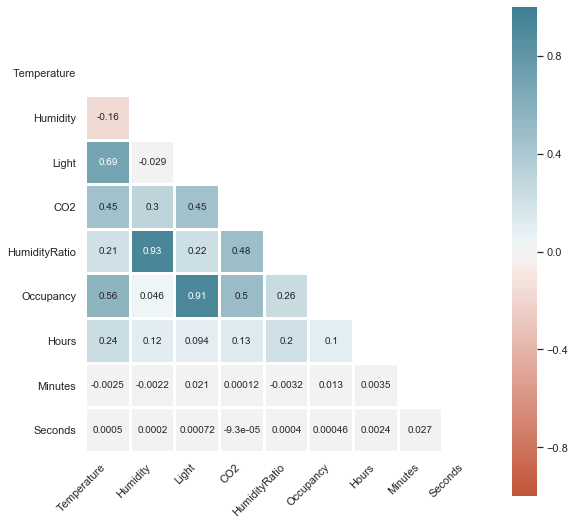

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='pearson')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [0]:
df_corr.corr(method='spearman')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Hours,Minutes,Seconds
Temperature,1.000000,-0.173272,0.630650,0.609697,0.175758,0.568565,0.256253,-0.003260,0.000409
Humidity,-0.173272,1.000000,0.012738,0.283459,0.921978,0.044859,0.134637,-0.002090,0.000152
Light,0.630650,0.012738,1.000000,0.454396,0.246166,0.826291,0.118688,0.012649,0.000132
CO2,0.609697,0.283459,0.454396,1.000000,0.478605,0.543502,0.159314,-0.003473,0.000246
HumidityRatio,0.175758,0.921978,0.246166,0.478605,1.000000,0.243270,0.209577,-0.002943,0.000442
Occupancy,0.568565,0.044859,0.826291,0.543502,0.243270,1.000000,0.103596,0.012578,0.000464
Hours,0.256253,0.134637,0.118688,0.159314,0.209577,0.103596,1.000000,0.003314,0.002459
Minutes,-0.003260,-0.002090,0.012649,-0.003473,-0.002943,0.012578,0.003314,1.000000,0.029075
Seconds,0.000409,0.000152,0.000132,0.000246,0.000442,0.000464,0.002459,0.029075,1.000000


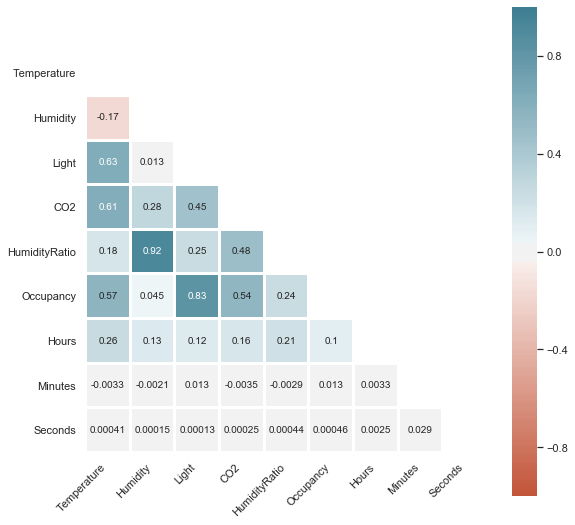

In [0]:
sns.set(style='white')
corr = df_corr.corr(method='spearman')
plt.figure(figsize = (9,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, 
                      mask=mask,
                      square=True,
                      cmap=sns.diverging_palette(20, 220, n=200), 
                      linewidths=2, 
                      center=0.0, vmax=1.0, vmin=-1.0, 
                      annot=True, annot_kws={"size": 10});
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');